# Naive Bayes

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import codecs
import re

## Importing the dataset

In [2]:
dataset = pd.read_csv(r'./datasets/datasets_483_982_spam.csv', encoding = 'latin-1')
all_data = []

for content, label in dataset[['v2','v1']].values:
    if label == 'spam':
        label = 1
    else :
        label = 0
    all_data.append([content, label])
all_data = np.array(all_data)

### 取出訓練內文與標註

In [3]:
X = all_data[:,0]
Y = all_data[:,1].astype(np.uint8)

In [4]:
print('Training Data Examples : \n{}'.format(X[:5]))

Training Data Examples : 
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"]


In [5]:
print('Labeling Data Examples : \n{}'.format(Y[:5]))

Labeling Data Examples : 
[0 0 1 0 0]


### 文字預處理

In [6]:
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords

import nltk

nltk.download('stopwords')

# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

## 創建Lemmatizer
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    """將pos_tag結果mapping到lemmatizer中pos的格式"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def clean_content(X):
    # remove non-alphabet characters
    X_clean = [re.sub('[^a-zA-Z]',' ', x).lower() for x in X]
    # tokenize
    X_word_tokenize = [nltk.word_tokenize(x) for x in X_clean]
    # stopwords_lemmatizer
    X_stopwords_lemmatizer = []
    stop_words = set(stopwords.words('english'))
    for content in X_word_tokenize:
        content_clean = []
        for word in content:
            if word not in stop_words:
                word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
                content_clean.append(word)
        X_stopwords_lemmatizer.append(content_clean)
    
    X_output = [' '.join(x) for x in X_stopwords_lemmatizer]
    
    return X_output
                 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aband\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
X = clean_content(X)

In [8]:
X[:2]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joking wif u oni']

## Bag of words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
#max_features是要建造幾個column，會按造字出現的高低去篩選 
"藉由BOW方式將資料轉換為Vector，自行填入"
vectorzier = CountVectorizer()
X = vectorzier.fit_transform(X)

In [11]:
X.shape

(5572, 6517)

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Fit the MultinomialNB model on the Training set

In [15]:
from sklearn.naive_bayes import MultinomialNB
"自行填入"
mul_nb = MultinomialNB(alpha=0.9)
mul_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.9)

## Predicting a new result (可與前章節KNN模型比較)

In [17]:
print('Trainset Accuracy: {}'.format(mul_nb.score(X_train, y_train)))

Trainset Accuracy: 0.9916984518734575


In [18]:
print('Testset Accuracy: {}'.format(mul_nb.score(X_test, y_test)))

Testset Accuracy: 0.9775784753363229


## Predicting the Test set results

In [19]:
y_pred = mul_nb.predict(X_test)

## Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[932  17]
 [  8 158]]


0.9775784753363229

In [21]:
def plot_cm_output(cm, labels=['ham', 'spam']):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)      # 圖, 可以用加的方式一直加入, 參考:https://www.itranslater.com/qa/details/2106581108069499904
    cax = ax.matshow(cm, cmap=plt.cm.Blues,)          # 畫2D圖, 飽含顏色, 參考: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.matshow.html
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

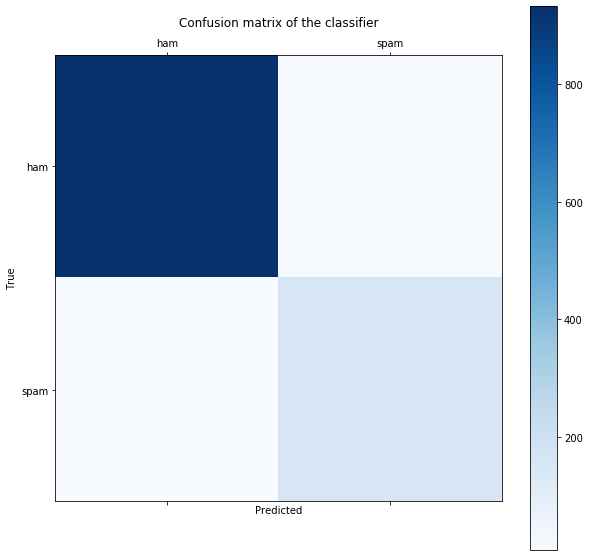

In [22]:
plot_cm_output(cm)